# Pipeline for analysing the RA data

In [1]:
# Initializing Pandas & Matplotlib
import os
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplt
import io
import re
import numpy as np
import datetime
import EMR_functions as em
from acronyms import ACRONYM_MAP
from acronyms import MEDICINE
#from datecols import DATECOLS

def getcwd():
    cwd = os.getcwd()
    return cwd

def read_csv(f_name):
    return pd.read_csv(f_name, sep="|")

def remove_rtf(df_rtf, column):
    df_clean = df_rtf[~df_rtf[column].str.contains(r"^\{.*\}.*", na=False)]
    return df_clean


#input_path = r"\\vf-reuma-e-it-health\reuma-e-it-health$\Uitvoer_dd_20180328" # absolute path

print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + plt.__version__)
#print(getcwd())
#em.makeFile('TestFile.txt', 'LALALALA')



Pandas version 0.23.0
Matplotlib version 3.0.3


In [2]:
# (is gelijk aan pipe_df = 2)pipe_df = 2
# Zorgen dat df_explore -> 100% juist is
df_REUBEL = read_csv(r'output_files/DF_REUBEL.csv')
pc_df.setDF(df_REUBEL)
df_total, df_gold = em.midasTouch(pc_df.getDF())
print(len(df_gold))
pc_df.setDF(df_total)
df_test, df_explore, df_typo_val = em.createExplorationSet(pc_df.getDF(), 12345, 0.15)

print(len(df_total['PATNR'].unique()))
print(len(df_typo_val['PATNR'].unique()))
print(len(df_explore['PATNR'].unique()))
print(len(df_test['PATNR'].unique()))

pc_df.setDF(df_explore)
pc_df.getDim()

print(pc_df.getDF().iloc[2780]['XANTWOORD'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-1b5dba10beb3>", line 4, in <module>
    pc_df.setDF(df_REUBEL)
NameError: name 'pc_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "G:\newAnacondaG\modules\lib\site-packages\IPython\core\ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "G:\newAnacondaG\modules\lib\site-packages\IPython\core\u

NameError: name 'pc_df' is not defined

In [5]:
#pc_df.setDF(df_REUBEL)
from acronyms_old import PARENT_MAP

sample4 = read_csv(r'test/Sample4_raw.csv')

pc_df = em.Processing(sample4)
sample4['XANTWOORD']= sample4['XANTWOORD'].apply(lambda x: pc_df.handleAcronym(str(x)))
sample4['XANTWOORD']= sample4['XANTWOORD'].apply(lambda x: pc_df.handleAcronym(str(x), PARENT_MAP))

l_med = pc_df.getRowsMedicine(sample4)

# df_corrected.iloc[l_typo_found]
#print(type(df_typo_rows.index.values))
for index, row in sample4.drop(l_med).iterrows():
    print(row['XANTWOORD'], "\n")
print(len(sample4))
print(len(l_med))
sample4.to_csv('output_files/Sample4_corrected.csv', sep='|', index=False)

1696
1696


### Open Checkpoint Tables

In [2]:
pipe_df = 1
print(os.getcwd())

if pipe_df == 0:
    df_REU = read_csv(r'output_files/DF_REU.csv')
    pc_df = em.Processing(df_REU)
    pc_df.createTableREUBEL()
elif pipe_df == 1:
    df_REUBEL = read_csv(r'output_files/DF_REUBEL.csv')
    pc_df = em.Processing(df_REUBEL)
    df_gold = read_csv(r'input_files/EMR_goldenstandard.csv')
    print(df_gold)
elif pipe_df == 2:
    df_nlp = read_csv(r'output_files/DF_REUBEL_nlp.csv')
    pc_df = em.Processing(df_nlp)

print(pc_df.getPatients())
print(df_REU[df_REU['PATNR'] == 96745944])
df_pat = df_REU[df_REU['PATNR'] == 96745944]
df_pat.to_csv('output_files/DF_pat96745944.csv', sep='|', index=False)

C:\Users\tdmaarseveen\Desktop\EMR_mining
     eacnumm zkhpatnr comet  studie  geslacht age_incl  diagstat  bezdat_rn1  \
0       1110  0865644             0         1     49,8         1    4/7/1999   
1       1121  6110525             0         2     51,6         1    4/6/1999   
2       1128  6311520             0         1     35,4         1   4/29/1999   
3       1142  0304500             0         1     68,4         1   5/20/1999   
4       1151  0262900             0         1     37,1         1   6/22/1999   
5       1160  5354748             0         1     48,3         1    7/8/1999   
6       1163  2182107             0         2     67,7         1    7/8/1999   
7       1173  6260616             0         1     50,6         1   7/20/1999   
8       1175  6346506             0         1     18,2         1    3/2/2000   
9       1178  9112084             0         1     73,2         1   8/17/1999   
10      1181  1210900             0         1     47,6         1   9/22/1999   

NameError: name 'df_REU' is not defined

# Validate Typo Algorithm

In [3]:
df = pd.read_csv(r'gold_standard/goudenstandaard_typoval.xlsx', sep="|")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


### Read & Process Golden standard

In [3]:
print(pc_df.getDim())

Rows: 45012	Columns: 56


In [ ]:
def getSurroundingWords(row):
    return

pc_df.getDF()['XANTWOORD'].apply(lambda x : getSurroundingWords(x))



In [5]:
def isDigit(string):
    try: 
        int(string)
        return True
    except ValueError:
        return False
        
df = pd.read_csv(r'input_files/goldstandardEMR_mining.csv', sep=";")
index_list = []
for index, row in df.iterrows(): # some rows incorrectly interpreted.
    if isDigit(row['eacnumm']) == False:
        index_list.append(index)
        print(index)
df_cor = df.copy()
start = df.columns.get_loc("diag4_medicat")+1
for x in index_list:
    df_cor.loc[x-1, 'diag4_medicat'] = str(df.loc[x-1, 'diag4_medicat']) + ', ' + str(df.loc[x, 'eacnumm'])
    for key, value in df.iloc[x-1, start:].iteritems():
        df_cor.loc[x-1, key] = value
df_cor = df_cor.drop(df_cor.index[index_list])
df_cor.reset_index(inplace=True)
del df_cor['index']
print(df_cor.head())
df_cor.to_csv('input_files/EMR_goldenstandard.csv', sep='|', index=False)

1
11
14
16
26
29
35
39
40
53
88
89
99
  eacnumm zkhpatnr comet studie geslacht age_incl diagstat bezdat_rn1 mtx_pn  \
0    1110  0865644            0        1     49,8        1   4/7/1999      1   
1    1121  6110525            0        2     51,6        1   4/6/1999      0   
2    1128  6311520            0        1     35,4        1  4/29/1999      0   
3    1142  0304500            0        1     68,4        1  5/20/1999      1   
4    1151  0262900            0        1     37,1        1  6/22/1999      1   

  mtxmis   ...   medici3 medici4 medicia inclusie_medica1 inclusie_medica2  \
0      0   ...       NaN     NaN     NaN              NaN              NaN   
1      0   ...                                          2                7   
2      0   ...                                          2                    
3      0   ...                                          2                4   
4      0   ...                                          2                    

  inclusie_m

In [67]:
# Determine intersection Golden Standard
def determineIntersection(s1, s2):
    # Input = column (Pandas Series)
    a1 = s1.unique()
    a1 = a1[a1 != np.array(None)]
    a2 = s2.unique()
    a2 = a2[a2 != np.array(None)]
    print(a2)
    return len(np.intersect1d(a1, a2))

df_gold = df_gold.replace(r'^\s+$', np.nan, regex=True)
df_gold['zkhpatnr'] = df_gold['zkhpatnr'].fillna(-1)
df_gold['zkhpatnr'] = df_gold['zkhpatnr'].astype(int)
determineIntersection(df_gold['zkhpatnr'], pc_df.getDF()['PATNR'])

[9655006 7043920 4071686 ... 1999476 7475742 7614373]


417

In [4]:
#print(MEDICINE)
#print(pc_df.med_list)
#df_REUBEL = read_csv(r'output_files/DF_REUBEL.csv')
#pc_df = em.Processing(df_REUBEL)
#print(pc_df.med_list)

df_test = pc_df.getDF().sample(n=1000)
#print(df_test.head(5))
pc_df.setDF(df_test)
print(len(pc_df.d_cutoff))
print(len(pc_df.med_list))
df_corrected, l_typo_found = pc_df.typoProcessing('XANTWOORD')
print(len(l_typo_found))

# daarna .getDF -> daar kun je de resterende regels (l_typo_found van af trekken)


#d_cut = pc_df.getDictCutOff()
#print(pc_df.d_cut)

21
21
anti-tnf Calculated amount of Typos: 2
sulfasalazine Calculated amount of Typos: 5
adalimumab Calculated amount of Typos: 3
prednison Calculated amount of Typos: 4
etanercept Calculated amount of Typos: 4
tocilizumab Calculated amount of Typos: 2
methotrexaat Calculated amount of Typos: 1
prednisolon Calculated amount of Typos: 3
depomedrol Calculated amount of Typos: 5
hydroxychloroquine Calculated amount of Typos: 1
leflunomide Calculated amount of Typos: 7
infliximab Calculated amount of Typos: 1
32


In [8]:
import pickle
print(df_corrected['XANTWOORD'].head(5))
print(l_typo_found)
df_nlp = read_csv(r'output_files/DF_TyposPerCat.csv')
print(df_nlp.head())


2412     controle 1 jaar lab a 6 maanden ( gezien stabi...
26385    brief nog afmaken retour huisarts ( tzt colchi...
37309    prberen methotrexaat naar 12,5 mg per week con...
27322                     heeft afspraak in dec lab vooraf
15904                     recept hydroxychloroquine gefaxt
Name: XANTWOORD, dtype: object
['509', '820', '508', '384', '651', '783', '28', '965', '286', '98', '987', '456', '177', '454', '79', '605', '631', '134', '533', '471', '758', '927', '541', '347', '818', '719', '776', '559', '135', '204', '830', '887']
   methotrexaat  leflunomide  sulfasalazine  hydroxychloroquine  azathioprine  \
0             1            7              5                   1             0   

   ciclosporine  abatacept  adalimumab  anakinra  certolizumab    ...     \
0             0          0           3         0             0    ...      

   golimumab  infliximab  rituximab  tocilizumab  tofacitinib  baricitinib  \
0          0           1          0            2          

In [86]:
import random
group_of_items = [1, 2, 3, 4]               # a sequence or set will work here.
num_to_select = 4                           # set the number to select here.
list_of_random_items = random.sample(group_of_items, num_to_select)
print(str(list_of_random_items))

[3, 2, 4, 1]


In [31]:
import nltk.corpus
from nltk.tokenize import RegexpTokenizer
from nltk.corpus.util import LazyCorpusLoader
from nltk.corpus.reader import *
from nltk.corpus.reader import AlignedCorpusReader
from glob import glob
from nltk.corpus.reader import XMLCorpusReader
import re

texts = glob('corpus/GSC-v1.1/*')
print(texts)
#for item_path in texts:
#    print(item_path)
    
file_ids = []
for item_path in texts:
    file_ids.append(re.sub('corpus/GSC-v1.1/', '', item_path))    
corpus = XMLCorpusReader('corpus/GSC-v1.1/', file_ids)
#eader = corpus.xml('EMEA_en_nl_mal.xml')

print(corpus.words('sample.txt'))
"""
corpus_root = './'
#reader = XMLCorpusReader(r'corpus/GSC-v1.1', r'Medline_en_nl_mal.xml')
reader = XMLCorpusReader(r'corpus/GSC-v1.1', r'Medline_en_nl_mal.xml')
#gnpec = AlignedCorpusReader(r'corpus/GSC-v1.1', r'EMEA_en_nl_mal.xml')
print(len(reader.words()))
emma = reader.words(r'sample.txt')
print(emma)

abc = LazyCorpusLoader(
    'abc',
    PlaintextCorpusReader,
    r'(?!\.).*\.txt',
    encoding=[('science', 'latin_1'), ('rural', 'utf8')],
)
#reader = XMLCorpusReader(r'corpus/GSC-v1.1', r'EMEA_en_nl_mal.xml')


#newcorpus = PlaintextCorpusReader(r'corpus/GSC-v1.1/EMEA_en_nl_mal.xml', '.*')
print(reader)
print(len(reader.raw())) #[1]
"""

['corpus/GSC-v1.1\\EMEA_en_de_mal.xml', 'corpus/GSC-v1.1\\EMEA_en_es_mal.xml', 'corpus/GSC-v1.1\\EMEA_en_fr_mal.xml', 'corpus/GSC-v1.1\\EMEA_en_nl_mal.xml', 'corpus/GSC-v1.1\\EMEA_GSC_de_man.xml', 'corpus/GSC-v1.1\\EMEA_GSC_en_man.xml', 'corpus/GSC-v1.1\\EMEA_GSC_es_man.xml', 'corpus/GSC-v1.1\\EMEA_GSC_fr_man.xml', 'corpus/GSC-v1.1\\EMEA_GSC_nl_man.xml', 'corpus/GSC-v1.1\\MantraAlign.xsd', 'corpus/GSC-v1.1\\MantraAnnotate.xsd', 'corpus/GSC-v1.1\\mantraDataEncoding.pdf', 'corpus/GSC-v1.1\\Medline_en_de_mal.xml', 'corpus/GSC-v1.1\\Medline_en_es_mal.xml', 'corpus/GSC-v1.1\\Medline_en_fr_mal.xml', 'corpus/GSC-v1.1\\Medline_en_nl_mal.xml', 'corpus/GSC-v1.1\\Medline_GSC_de_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_en_de_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_en_es_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_en_fr_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_en_nl_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_es_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_fr_man.xml', 'corpus/GSC-v1.1\\Medline_GSC_nl_man.xml', '

ParseError: syntax error: line 1, column 0 (<string>)

In [45]:
import io
import xml.etree.ElementTree as ET
tree = ET.parse('country_data.xml')
root = tree.getroot()
nltk.download('punkt')

tree = ET.parse(r'corpus/GSC-v1.1/Medline_en_nl_mal.xml' , 'r', encoding='utf8')
raw = f.read()
#my method
tokens = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(raw)]
train_sents = nltk.Text(tokens)
print(train_sents[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tdmaarseveen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
['<', '?', 'xml', 'version=', "''", '1.0', "''", 'encoding=', "''", 'UTF-8', "''", 'standalone=', "''", 'yes', "''", '?', '>', '<', 'CorpusAlign', 'id=', "''", 'Medline_en_nl_mal', "''", 'sourceLang=', "''", 'en', "''", 'targetLang=', "''", 'nl', "''", 'sourceCorpus=', "''", 'Medline_en_man', "''", 'targetCorpus=', "''", 'Medline_nl_man', "''", 'date=', "''", '2012-11-12', "''", 'description=', "''", 'Link', 'between', 'en', 'and', 'nl', 'corpora', 'by', 'julielab', '.']


In [3]:
import bratreader
from bratreader.repomodel import RepoModel

r = RepoModel(r"C:/Users/tdmaarseveen/Desktop/EMR_mining/corpus/EMCDutchClinicalCorpus/EMCDutchClinicalCorpus/SP") # load repomodel
r.documents            			    # all documents in your brat corpus

doc = r.documents["SP1111"] 			# get document with key 001
print(doc.sentences)    			# a list of sentences in document
print(doc.annotations)  			# the annotation objects in a document

# Save to XML
r.save_xml("my_folder")

[Annotation: b'braken', Annotation: b'braken', Annotation: b'braken', Annotation: b'koorts', Annotation: b'koorts', Annotation: b'koorts', Annotation: b'infectie', Annotation: b'infectie', Annotation: b'infectie']


In [30]:
#pc_df.getDF().head(20)['AUTEURCD']
df_REU = pc_df.getDF()
df_REU = df_REU.dropna(subset=['GEBRUIKER'])
print(df_REU.head(5))
#df_REU = df_REU.dropna(subset=['XANTWOORD'])
#for x in pc_df.getDF():
df_REU[df_REU['GEBRUIKER'].str.contains('18471')]['XANTWOORD']

         ID     LIJSTID CATEGORIE                      DATUM   TIJD  \
0  96763433  CS00000503  REU       2011-07-08 00:00:00+00:00  13:07   
1  96776947  CS00000503  REU       2011-07-25 00:00:00+00:00  12:18   
2  96761548  CS00000503  REU       2011-07-05 00:00:00+00:00  11:42   
3  96904311  CS00000503  REU       2011-12-13 00:00:00+00:00  13:46   
4  96816027  CS00000503  REU       2011-08-25 00:00:00+00:00  10:46   

                MUTDAT MUTTIJD GEBRUIKER  DEFINITIEF  COMPLEET   ...     \
0  2011-07-08 00:00:00  13:10   10388     False       False      ...      
1  2011-07-25 00:00:00  12:25   10388     False       False      ...      
2  2011-07-05 00:00:00  11:51   06800     False       False      ...      
3  2011-12-13 00:00:00  22:16   11085     False       False      ...      
4  2011-08-25 00:00:00  10:47   16283     False       False      ...      

   VRLIJSTTYPEID   DOSSIERID  PARENTBEANTWID  REALSUBID  EENHEIDCD  MODEL_ID  \
0  TC             REU9655006 NaN          

225      expectatief, hoofdbehandelaar longarts co over 4 maanden of bij klachten pcm 3dd toevoegen aan naproxen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
360      iom jvr : zo door bij verhoogde rr bij voglende infuus dan contact opnemen met de huisarts voor vervolg rr. tc volgende week : zoveel dorst door droge slijmvliezen. retour 4 maanden met lab                                                                                               

In [16]:
#print(pc_df.getDF().sample(n=10)['XANTWOORD'])
#matchers = ['boven']
#freq_list = []

#print(len(['methotrexaat', 'leflunomide', 'sulfasalazine', 'hydroxychloroquine', 'azathioprine', 'ciclosporine', 'goud', 'abatacept', 'adalimumab', 'anakinra', 'certolizumab', 'etanercept', 'golimumab', 'infliximab', 'rituximab', 'tocilizumab', 'tofacitinib', 'baricitinib', 'depomedrol', 'prednison', 'prednisolon', 'anti-tnf']))

pd.set_option('display.max_colwidth', -1)
#pc_df.getDF()[pc_df.getDF()['XANTWOORD'].str.contains(' voud ')]['XANTWOORD']
pc_df.getDF()[pc_df.getDF()['XANTWOORD'].str.contains(' voud ')]['XANTWOORD'].to_csv(r'output_files/DF_voud.csv', sep='|', index=False)

# Step 1: Formatting data from files into pandas dataframe

### 1.1 LOADING DDR_A table

#### Convert DDR_A table from UTF16-le to ASCII 
    The DDR_A is converted to ASCII
    Reminder: The DDR_A input table must first be cleansed of newlines!

In [10]:
em.convert_to_ascii(r"output_files/dbo.proc_DDR_A.txt", r'fin_DDR_A.txt')

### Loading DDR_A table & Taking patient selection with REU dossier

1. Taking all of the rows where CATEGORIE equals REU
2. Converting DATUM to DatetimeIndex
3. Calculating the total timespan for every patient (this function causes errors if you havent loaded python3.5 and conda3)
    - first sort values on patientnr and datum, then group by the patientnr and then select the greates difference
4. Converting Time to Integer
5. Replacing empty strings in XANTWOORD and DUURTOT with Nan
6. Removing the Nans in XANTWOORD & STELLING
7. Writing dataframe to DF_REU.csv
8. Only selecting rows where STELLING == Beleid
9. Writing dataframe to DF_REUBEL.csv


In [3]:
conv_ddrA = em.build_convenient_list(r"output_files/fin_DDR_A.txt", "|", "ascii")
df_ddrA = em.list_to_df(conv_ddrA)

pc_df = em.Processing(df_ddrA)
pc_df.createTableREU()
pc_df.createTableREUBEL()
print(pc_df.getDim())

conv_ddrA = None

#dcm_mv = build_convenient_list(r"dbo.proc_DCM_MV.txt", "|", "utf-16")
#df_mv = list_to_df(dcm_mv)
#dcm_mv = None


/exports/reum/tdmaarseveen/EMR_mining/emr_mining.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df['DATUM'] = pd.DatetimeIndex(pd.to_datetime(self.df['DATUM'])).tz_localize('UTC')


Rows: 352161	Columns: 56


## Step 2: Observing Data


#### DDR_A Plot: Total timespan per patient in days (REU)

Text(-0.1,0.5,'Number of dossier entries')

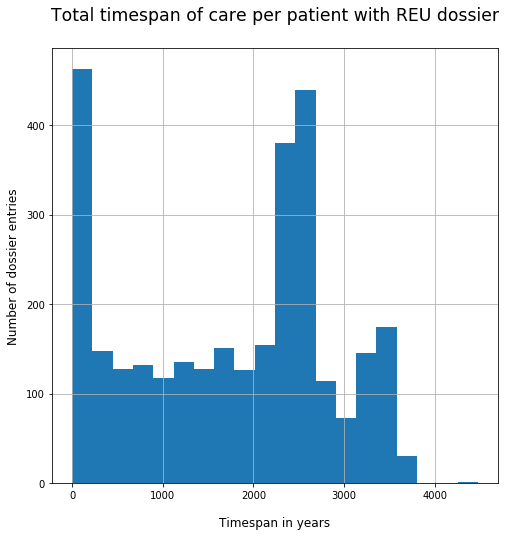

In [5]:
fig = pc_df.getDF().groupby('PATNR')['DUURTOT'].mean().hist(bins=20, figsize = (8,8))
fig.set_title('Total timespan of care per patient with REU dossier', x=0.5, y=1.05, ha='center', fontsize='xx-large')

fig.text(0.5, -0.1, 'Timespan in years', ha='center', fontsize='large', transform=fig.transAxes)
fig.text(-0.1, 0.5, 'Number of dossier entries', va='center', rotation='vertical', fontsize='large', transform=fig.transAxes)


#### DDR_A Plot: Unique dossier entries added per day with REU category

##### Description figure:
EZIS/ HIX started being utilized in 2011, which explains the sudden peak in 2011. Data before 2011 -> (old dossiers from meteor -> converted to HIX). Those rows don't have a Beleid section as well.
These old dossiers are characterized with the line 'Conversie gegevens meteor'. 

Text(-0.1,0.5,'Number of dossier entries')

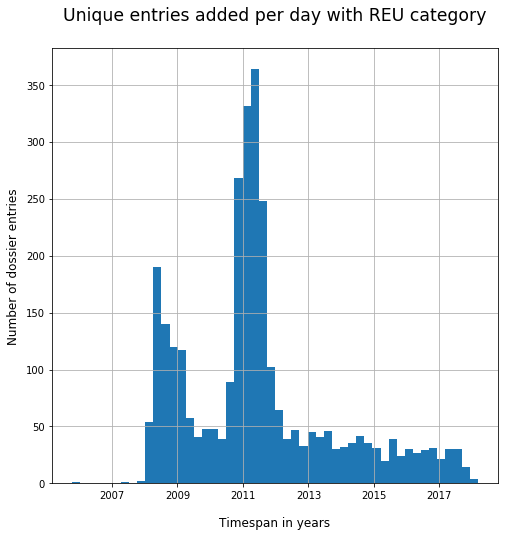

In [7]:
fig2 = pc_df.getDF().groupby(['DOSSIERID'])['DATUM'].nsmallest(1).hist(bins=50, figsize = (8,8)) 

fig2.set_title('Unique entries added per day with REU category', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig2.text(0.5, -0.1, 'Timespan in years', ha='center', fontsize='large', transform=fig2.transAxes)
fig2.text(-0.1, 0.5, 'Number of dossier entries', va='center', rotation='vertical', fontsize='large', transform=fig2.transAxes)

#### Determine patients without REU category

In [8]:
print(em.determineIntersection(df_ddrA['PATNR'], pc_df.getDF()['PATNR']))

3046


#### Frequency of Methotrexaat in different parts of the dossier (default: DF_REU)

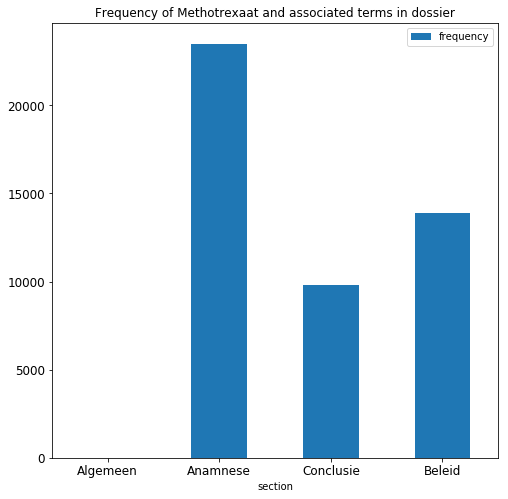

In [10]:
matchers = ['methotrexaat', 'mtx']
freq_list = []

for x in ['Algemeen', 'Anamnese', 'Conclusie', 'Beleid']:
    matching = [s for s in pc_df.getDF()[pc_df.getDF()['STELLING'].isin([x])]['XANTWOORD'] if any(xs in s for xs in matchers)]
    freq_list.append(len(matching))

df = pd.DataFrame({'section':['Algemeen', 'Anamnese', 'Conclusie', 'Beleid'], 'frequency':freq_list})

ax = df.plot(kind='bar', title ="Frequency of Methotrexaat and associated terms in dossier", x='section', figsize=(8, 8), legend=True, fontsize=12, rot=0)



## Step 3: Natural Language Processing | Feature extraction


### Reading df_REUBEL table & Removing Stopwords 

In [5]:
df_REUBEL = read_csv(r'output_files/DF_REUBEL.csv')
pc_df = em.Processing(df_REUBEL)
print(pc_df.getPatients())

2771


In [57]:
import spacy
from spacy import displacy as dis
nlp = spacy.load(r'E:\modules\Anaconda\Program\Lib\site-packages\nl_core_news_sm\nl_core_news_sm-2.0.0', parser=True)
#nlp = spacy.load(r'E:\modules\Anaconda\Program\Lib\site-packages\nl_core_news_sm\nl_core_news_sm-2.0.0', chunking=True)
sent = "D"

#print(nlp.chunks)

def removeStop(sent):
    # zo door -> door wordt gezien als Stop woord!
    proc_sent = ""
    doc = nlp(sent)
    print(doc)
    for word in doc:
        print(word, word.tag_)
        if (word.is_stop == False) or (word.dep_ == 'advmod' or word.dep_ == 'nmod'):
            proc_sent += str(word) + " "
    
    #for chunk in doc.noun_chunks:

    return proc_sent

doc = nlp('zo door met mtx en leflunomide. start methotrexaat stop de sulfasalazine verhoog dosis')

sentences = [x for x in doc.sents]
print(sentences[1])
#print([np.text for np in nlp('zo door met mtx en leflunomide. start methotrexaat stop de sulfasalazine verhoog dosis').noun_chunks])
#print([(x.text, x.pos_) for x in nlp('zo door met mtx en leflunomide. start methotrexaat stop de sulfasalazine verhoog dosis') if x.pos_ != u'SPACE'])

#dis.render(doc, style='dep', jupyter=True)
print(dict([(str(x), x.label_) for x in nlp(str(sentences[1])).ents]))
#print(removeStop('zo door met mtx en leflunomide. start methotrexaat stop de sulfasalazine verhoog dosis'))



#df_nlp = df_REUBEL
#df_nlp['XANTWOORD'] = df_REUBEL['XANTWOORD'].apply(lambda x: removeStop(str(x)))
#df_nlp.to_csv('output_files/REUBEL_nlp.csv', sep='|')
#df_nlp = read_csv('output_files/REUBEL_nlp.csv')

start methotrexaat stop de sulfasalazine verhoog dosis
{}


In [4]:
import pattern.text.nl 

In [48]:


from pattern.vector import Document, Model

d1 = Document('De kat kwispelt.', name='cat1')
d2 = Document('De kat is nieuwsgierig.', name='cat2')
d3 = Document('The dog wags his tail.', name='dog1')
d4 = Document('The dog is happy.', name='dog2')

m = Model([d1, d2, d3, d4])
m.reduce(2)
 
for d in m.documents:
    print()
    print(d.name)
    for concept, w1 in m.lsa.vectors[d.id].items():
        for feature, w2 in m.lsa.concepts[concept].items():
            if w1 != 0 and w2 != 0:
                print(feature, w1 * w2)




cat1

cat2

dog1
dog 0.2309401076758498
wags 0.1154700538379249
tail 0.1154700538379249
happy 0.34641016151377513
dog 0.06963106238227981
wags 0.557048499058234
tail 0.557048499058234
happy 0.4177863742936744

dog2
dog 0.46188021535170054
wags 0.23094010767585027
tail 0.23094010767585027
happy 0.6928203230275517
dog 0.03481553119113982
wags 0.27852424952911636
tail 0.27852424952911636
happy 0.2088931871468367


In [3]:
from pattern.nl import parse
from pattern.nl import pprint 

s = ' polyartritis door actieve ra onder etanercept ( nu sinds 10 weken ) en leflunomide 20 mg ( 10 maanden @ 2 . in ernst toegenomen pijn knieen bdz ( waardoor lopen met rollator ) , bij 1 of secundaire artrose . @ 3 . passagere pijn lumbale wk , inzakking ? diagnostiek osteoporose volgt ( elders ) @ 4 . diarree . dd metformine , . coeliakie ? hyperthyreoidie ? infectieus ? @ 5 . gewichtsverlies 10 kg in 4 mnd . dd bij actieve ra , of relatie met 4 @ 6 . hoesten , bij gebruik enbrel . @ 7 . hypercalciemie , primaire hyperpara ? '
#s = parse(s, relations=False, lemmata=True)
s = parse(s, 
   tokenize = True,         # Split punctuation marks from words?
       tags = True,         # Parse part-of-speech tags? (NN, JJ, ...)
     chunks = True,         # Parse chunks? (NP, VP, PNP, ...)
  relations = True,        # Parse chunk relations? (-SBJ, -OBJ, ...)
    lemmata = True,        # Parse lemmata? (ate => eat)
   encoding = 'utf-8' ,      # Input string encoding.
     tagset = None)
pprint(s)



          WORD   TAG    CHUNK   ROLE   ID     PNP    LEMMA          
                                                                    
  polyartritis   NN     NP      -      -      -      polyartritis   
          door   IN     PP      -      -      PNP    door           
       actieve   JJ     NP      -      -      PNP    actief         
            ra   NN     NP ^    -      -      PNP    ra             
         onder   IN     PP      -      -      -      onder          
    etanercept   VBZ    VP      -      -      -      etanerceppen   
             (   (      -       -      -      -      (              
            nu   RB     ADVP    -      -      -      nu             
         sinds   IN     PP      -      -      PNP    sinds          
            10   CD     NP      -      -      PNP    10             
         weken   NNS    NP ^    -      -      PNP    week           
             )   )      -       -      -      -      )              
            en   CC     -       - 

In [32]:
from pattern.vector import words, count
from pattern.vector import Document, Model, TFIDF 
s1 = ' polyartritis door actieve ra onder etanercept ( nu sinds 10 weken ) en leflunomide 20 mg ( 10 maanden @ 2 . in ernst toegenomen pijn knieen bdz ( waardoor lopen met rollator ) , bij 1 of secundaire artrose . @ 3 . passagere pijn lumbale wk , inzakking ? diagnostiek osteoporose volgt ( elders ) @ 4 . diarree . dd metformine , . coeliakie ? hyperthyreoidie ? infectieus ? @ 5 . gewichtsverlies 10 kg in 4 mnd . dd bij actieve ra , of relatie met 4 @ 6 . hoesten , bij gebruik enbrel . @ 7 . hypercalciemie , primaire hyperpara ? '
s2 = '1 . ua , ( ongedifferentieerde ) perifere non - erosieve spa dd seronegatieve ra sinds 2009 obv geobjectiveerde artritis mcp rechts , mtp bdz en pols rechts , met tenosynovitis handen / achillespezen , waarvoor thans sulfasalazine en leflunomide . bij vorige bezoek mild actief waarvoor dosis sasp opgehoogd . @ 2 . pijnsyndroom . @ 3 . recidiverende zwelling handruggen dd angio - oedeem / tenosynovitis bij ra . '

d1 = Document(s1, type='ra', stopwords=False)
d2 = Document(s2, type='ra')
m = Model(documents=[d1, d2], weight=TFIDF)
#print(d1.vector)
print((d1.vector, d2.vector))
#print(m.similarity(d1, d2))


"""
count(
      words = words(s, 
       filter = lambda w: w.strip("'").isalnum(),
  punctuation = '.,;:!?()[]{}`''\"@#$^&*+-|=~_'), 
        top = None,         # Filter words not in the top most frequent (int).
  threshold = 0,            # Filter words whose count <= threshold.
    stemmer = None,         # PORTER | LEMMA | function | None
    exclude = ['\d'],           # Filter words in the exclude list.
  stopwords = False,        # Include stop words?
   language = 'nl')     
"""

({'polyartritis': 0.010045618069675273, 'door': 0.010045618069675273, 'actieve': 0.020091236139350547, 'onder': 0.010045618069675273, 'etanercept': 0.010045618069675273, 'nu': 0.010045618069675273, '10': 0.03013685420902582, 'weken': 0.010045618069675273, '20': 0.010045618069675273, 'mg': 0.010045618069675273, 'maanden': 0.010045618069675273, 'ernst': 0.010045618069675273, 'toegenomen': 0.010045618069675273, 'pijn': 0.020091236139350547, 'knieen': 0.010045618069675273, 'waardoor': 0.010045618069675273, 'lopen': 0.010045618069675273, 'rollator': 0.010045618069675273, 'secundaire': 0.010045618069675273, 'artrose': 0.010045618069675273, 'passagere': 0.010045618069675273, 'lumbale': 0.010045618069675273, 'wk': 0.010045618069675273, 'inzakking': 0.010045618069675273, 'diagnostiek': 0.010045618069675273, 'osteoporose': 0.010045618069675273, 'volgt': 0.010045618069675273, 'elders': 0.010045618069675273, '4': 0.03013685420902582, 'diarree': 0.010045618069675273, 'metformine': 0.010045618069675

'\ncount(\n      words = words(s, \n       filter = lambda w: w.strip("\'").isalnum(),\n  punctuation = \'.,;:!?()[]{}`\'\'"@#$^&*+-|=~_\'), \n        top = None,         # Filter words not in the top most frequent (int).\n  threshold = 0,            # Filter words whose count <= threshold.\n    stemmer = None,         # PORTER | LEMMA | function | None\n    exclude = [\'\\d\'],           # Filter words in the exclude list.\n  stopwords = False,        # Include stop words?\n   language = \'nl\')     \n'

In [6]:
from pattern.nl import parsetree

s = ' polyartritis door actieve ra onder etanercept ( nu sinds 10 weken ) en leflunomide 20 mg ( 10 maanden @ 2 . in ernst toegenomen pijn knieen bdz ( waardoor lopen met rollator ) , bij 1 of secundaire artrose . @ 3 . passagere pijn lumbale wk , inzakking ? diagnostiek osteoporose volgt ( elders ) @ 4 . diarree . dd metformine , . coeliakie ? hyperthyreoidie ? infectieus ? @ 5 . gewichtsverlies 10 kg in 4 mnd . dd bij actieve ra , of relatie met 4 @ 6 . hoesten , bij gebruik enbrel . @ 7 . hypercalciemie , primaire hyperpara ? '
#s = parse(s, relations=False, lemmata=True)
s = parsetree(s, 
   tokenize = True,         # Split punctuation marks from words?
       tags = True,         # Parse part-of-speech tags? (NN, JJ, ...)
     chunks = True,         # Parse chunks? (NP, VP, PNP, ...)
  relations = True,        # Parse chunk relations? (-SBJ, -OBJ, ...)
    lemmata = True,        # Parse lemmata? (ate => eat)
   encoding = 'utf-8' ,      # Input string encoding.
     tagset = None)
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            print(word)
        print()


polyartritis

door

actieve
ra

onder

etanercept

nu

sinds

10
weken

leflunomide

20
mg

10
maanden

in

ernst

toegenomen

pijn
knieen
bdz

waardoor
lopen

met

rollator

bij

1
of
secundaire
artrose

passagere
pijn

lumbale
wk

inzakking

diagnostiek
osteoporose
volgt

elders

diarree

dd
metformine

coeliakie

hyperthyreoidie

infectieus

gewichtsverlies

10
kg

in

4
mnd

dd

bij

actieve
ra

relatie

met

hoesten

bij

gebruik
enbrel

hypercalciemie

primaire
hyperpara



In [11]:
from pattern.nl import conjugate, lemma, lexeme, parsetree, suggest

print(lexeme('doe'))
print(lemma('doen'))
print(conjugate('doen', '1sg'))

s = parsetree('het monster doet graag de was', relations=True, lemmata=True, chunks=True)
# CHUNKING
print(suggest("ia"))


for sentence in s:
    for chunk in sentence.chunks:
        print(chunk.type, [(w.string, w.type) for w in chunk.words])
        

        
        
#text = Text(s, token=[WORD, POS, CHUNK, PNP, REL, LEMMA])

['doen', 'doe', 'doet', 'doend', 'deden', 'deed', 'gedaan']
doen
doe
[('in', 0.5341432571583417), ('is', 0.2322735073615753), ('ik', 0.08287417577454612), ('na', 0.05053744015897389), ('a', 0.028046246951494897), ('i', 0.02231054105320206), ('it', 0.013097281185078132), ('via', 0.009303585945262398), ('va', 0.004245325625508084), ('la', 0.0038388582783849697), ('if', 0.0037936952398157347), ('ga', 0.0024839671213079217), ('ja', 0.001445217234215518), ('ii', 0.001400054195646283), ('ita', 0.0013097281185078132), ('fa', 0.0012194020413693434), ('ka', 0.0011290759642308735), ('ba', 0.0010839129256616385), ('aa', 0.0005871195014000542), ('ca', 0.0004516303856923494), ('ian', 0.00040646734712311447), ('da', 0.0003613043085538795), ('ma', 0.0003161412699846446), ('iv', 0.0003161412699846446), ('ha', 0.0003161412699846446), ('pa', 0.00027097823141540963), ('oia', 0.0002258151928461747), ('ip', 0.0002258151928461747), ('il', 0.0002258151928461747), ('sa', 0.00018065215427693975), ('ta', 0.0001

AttributeError: 'Text' object has no attribute 'relations'

In [3]:
from pattern.graph import Graph

g = Graph()
for n1, n2 in (
    ('cat', 'tail'), ('cat', 'purr'), ('purr', 'sound'),
    ('dog', 'tail'), ('dog', 'bark'), ('bark', 'sound')):
    g.add_node(n1)
    g.add_node(n2)
    g.add_edge(n1, n2, weight=0.0, type='is-related-to')

    for n in sorted(g.nodes, key=lambda n: n.weight):
        print('%.2f' % n.weight, n)
g.export('figures/graph.html', encoding='utf-8')

0.00 Node(id='cat')
1.00 Node(id='tail')
0.00 Node(id='cat')
1.00 Node(id='tail')
1.00 Node(id='purr')
0.00 Node(id='cat')
0.10 Node(id='tail')
0.10 Node(id='purr')
1.00 Node(id='sound')
0.00 Node(id='cat')
0.00 Node(id='dog')
0.22 Node(id='tail')
0.11 Node(id='purr')
1.00 Node(id='sound')
0.00 Node(id='cat')
0.00 Node(id='dog')
0.11 Node(id='purr')
0.11 Node(id='bark')
0.23 Node(id='tail')
1.00 Node(id='sound')
0.00 Node(id='cat')
0.00 Node(id='dog')
0.11 Node(id='purr')
0.11 Node(id='bark')
0.23 Node(id='tail')
1.00 Node(id='sound')


### Processing Typos

In [38]:
pc_df.getDim()


'Rows: 45012\tColumns: 56'

In [3]:
df_test = pc_df.getDF().sample(n=1000)

print(pc_df.getDim())

Rows: 45012	Columns: 57


In [24]:
#global l_score_typo

#l_score_typo = [0, 0, 0, 0, 0, 0]

def damerauLevenshtein(s1, s2):
    d = {}
    lenstr1 = len(s1)
    lenstr2 = len(s2)
    for i in range(-1,lenstr1+1):
        d[(i,-1)] = i+1
    for j in range(-1,lenstr2+1):
        d[(-1,j)] = j+1
 
    for i in range(lenstr1):
        for j in range(lenstr2):
            if s1[i] == s2[j]:
                cost = 0
            else:
                cost = 1
            d[(i,j)] = min(
                           d[(i-1,j)] + 1, # deletion
                           d[(i,j-1)] + 1, # insertion
                           d[(i-1,j-1)] + cost, # substitution
                          )
            if i and j and s1[i]==s2[j-1] and s1[i-1] == s2[j]:
                d[(i,j)] = min (d[(i,j)], d[i-2,j-2] + cost) # transposition
 
    return d[lenstr1-1,lenstr2-1]

def isDigit(string):
    try: 
        int(string)
        return True
    except ValueError:
        return False

def calculateTyposInAll(text, word):
        for x in re.split(' |\n',str(text)):
            if isDigit(x) == False : # NOT in MEDICINE
                score = damerauLevenshtein(x, word)
                if score != 0 and score < 7:
                    l_score_typo[(score-1)] = int(l_score_typo[(score-1)])+1
        return text

def typoCutOffGraph(df, column, med): # column, medication_list
    for x in range(1,7):
        df[column] = df[column].apply(lambda x : calculateTyposInAll(x, med))
    return

#print(l_score_typo)
print('mte : mtx -> ' + str(damerauLevenshtein('prednison', 'prendi')))
#print('mxt : mtx -> ' + str(damerau_levenshtein_distance('mxt', 'mtx')))
#print('met : mtx -> ' + str(damerau_levenshtein_distance('met', 'mtx')))

#df_REU['XANTWOORD'] = df_REU['XANTWOORD'].apply(lambda x: handle_acronym(str(x)))



mte : mtx -> 4


[96, 25, 1535, 371, 20315, 117312, 9048, 185262]
[0, 1206, 114, 594, 426, 9048, 185262]


Text(0.5,0,'Damerau-Levenshtein score')

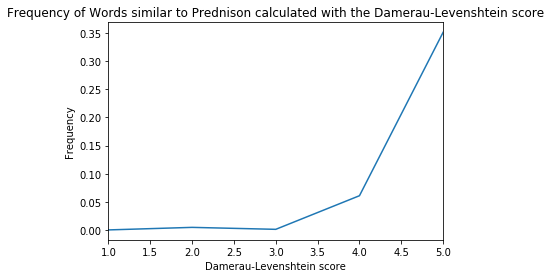

In [40]:
#l_pred = l_score_typo

print(l_score_typo)
print(l_pred)
#figsize=(8, 8), legend=True,
#l_score_typo.insert(0, 0)
n_list = []
#print(l_score_typo)
#for x in MEDICATION:
#    if x != gold:

for x in l_score_typo[0:6]:
    n_list.append(x / sum(l_score_typo))
#y_axis += [int(i) / summ]
pyplt.plot(n_list[0:6])
pyplt.xlim(1, 5)
pyplt.title('Frequency of Words similar to Prednison calculated with the Damerau-Levenshtein score')
pyplt.ylabel('Frequency')
pyplt.xlabel('Damerau-Levenshtein score')


#### Patienten die wel een conclusie maar geen beleid hebben 

In [4]:
med_list = MEDICINE
med_list.pop(6)
print(med_list)

['methotrexaat', 'leflunomide', 'sulfasalazine', 'hydroxychloroquine', 'azathioprine', 'ciclosporine', 'abatacept', 'adalimumab', 'anakinra', 'certolizumab', 'etanercept', 'golimumab', 'infliximab', 'rituximab', 'tocilizumab', 'tofacitinib', 'baricitinib', 'depomedrol', 'prednison', 'prednisolon', 'anti-tnf']


In [6]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import BoxSelectTool, HoverTool
from bokeh.models.sources import ColumnDataSource
from bokeh.palettes import viridis
from bokeh.transform import jitter
output_file('MedicationTypos.html')


med_list = ['mtx', 'pred']
typo_df = pd.DataFrame(columns = med_list) # med_list
sum_list = []

for x in med_list: # med_list
    l_score_typo = pc_df.typoCutOffGraph(df_test, 'XANTWOORD', x) # pc_df.getDF()
    n_list = []
    if sum(l_score_typo) != 0:
        for y in l_score_typo[0:6]:
            n_list.append(int(y) / sum(l_score_typo))
    else :
        n_list =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    sum_list.append(sum(l_score_typo))
    typo_df[x] = n_list #n_list  

    
numlines=len(typo_df.columns)
mypalette=viridis(22)
p = figure(plot_width=1000, plot_height=600)
hover = HoverTool(
   tool_tips = [
    ("name", leg),
    ("index", "$index"),
    ("(x,y)", "(@x, @y)")
    ] 
)

for (leg, x, y, colnr ) in zip(med_list,[typo_df.index.values]*numlines, [typo_df[name].values for name in typo_df], range(0,numlines)):
    my_plot = p.line(x+1, y, line_color=mypalette[colnr], line_width=5, legend=leg + " : " + str(sum_list[colnr]))
    hover.tool_tips = [
    ("name", leg),
    ("index", "$index"),
    ("(x,y)", "(@x, @y)")
    ]
p.add_tools(hover)

    
show(p)

NameError: name 'leg' is not defined

In [6]:
def handleAcronym(text, acronym_mapping=ACRONYM_MAP):
    """
    This function writes converts acronym to the full medication word
    \b - indicates begin and end of word
    """
    acronyms_pattern = re.compile(r'({})'.format('|'.join(acronym_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(acronym):
        match = acronym.group(0)
        expanded_acronym = acronym_mapping.get(match)
        return " " + expanded_acronym + " "

    expanded_text = acronyms_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    expanded_text = re.sub(r'\s+', ' ', expanded_text)
    return str(expanded_text)
handleAcronym('mtx lalalal erokeomtx d;afp ')

' methotrexaat lalalal erokeo methotrexaat d;afp '

In [9]:
import pandas as pd

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.periodic_table import elements

elements = elements.copy()
elements = elements[elements["atomic number"] <= 82]
elements = elements[~pd.isnull(elements["melting point"])]
mass = [float(x.strip("[]")) for x in elements["atomic mass"]]
elements["atomic mass"] = mass

palette = ["#053061", "#2166ac", "#4393c3", "#92c5de", "#d1e5f0",
           "#f7f7f7", "#fddbc7", "#f4a582", "#d6604d", "#b2182b", "#67001f"]

melting_points = elements["melting point"]
low = min(melting_points)
high = max(melting_points)
melting_point_inds = [int(10*(x-low)/(high-low)) for x in melting_points] #gives items in colors a value from 0-10
elements['melting_colors'] = [palette[i] for i in melting_point_inds]

TITLE = "Density vs Atomic Weight of Elements (colored by melting point)"
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above", plot_width=1200, title=TITLE, x_axis_label='lala', y_axis_label='po')
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
#p.xaxis.axis_label = "atomic weight (amu)"
#p.yaxis.axis_label = "density (g/cm^3)"
p.grid.grid_line_color = "white"

source = ColumnDataSource(elements)

p.circle("atomic mass", "density", size=12, source=source,
         color='melting_colors', line_color="black", fill_alpha=0.8)

labels = LabelSet(x="atomic mass", y="density", text="symbol", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

output_file("elements.html", title="elements.py example")

show(p)

In [133]:
a7 = df_REU[df_REU['STELLING'].isin(['Conclusie'])]['PATNR'].unique()
a7 = a7[a7 != np.array(None)]
a8 = df_REU[df_REU['STELLING'].isin(['Beleid'])]['PATNR'].unique()
a8 = a8[a8 != np.array(None)]
print(len(np.setdiff1d(a7, a8)))
print(np.setdiff1d(a7, a8))


NameError: name 'df_REU' is not defined

#### Function: Handle acronym (for expanding the acronym) and Levenshtein distance

In [8]:
freq_list = []
for i in MEDICINE:
    matching = [s for s in df_proc['XANTWOORD'] if any(xs in s for xs in [i])]
    freq_list.append(len(matching))

In [60]:
haystack = ["foo", ".bar", "baz", "foo", "qurx", "bother"]
pattern = r"\s" + "." + r"([a-z]{1,})"


re.sub(pattern, 'rep', 'lalalal. .temd eotkter, 4ok3o2 3oke3')


'lalalal.reprep,rep3o2rep3'

In [7]:
import re
def handleStickyChars(text):
        """
        This function surrounds a sticky character with spaces to prevent the algorithm from misinterpreting
        medication: mtx.depo -> mtx . depo
        
        Dots and commas between integers remain: 7,5 mg -> 7,5 mg
        
        When there is a single quote ("'") the function only adds spaces if the quote isn't
        followed with a character: (1) methotrexaat' -> methotrexaat '
            (2) cortico's -> cortico's 
            
        Only medications that stick to a hyphen will be seperated with spaces: 
            mtx-infliximab -> mtx - infliximab 
        
        The function also appends an whitespace to digits: 5mtx -> 5 mtx. 
        Except when there is an acronym like anti-il1 which consists of an
        integer!
            
        Finally, this function removes all of the duplicate whitespace. 
        """
        for ch in ['@','-', ',', '"', '#', '/','\\','+',':',']','(',')','>', ';', '?', '[','<','.','!','$','\'', '=', '&']:
            if ch in text:
                text = re.sub(re.escape(ch) + r'{2,}', ch, text) # or just two special characters from above list -> TODO
                if ch == '\'':
                    text = re.sub(r"\'\s"," ' ",text)
                elif ch == '-':
                    pat = re.compile(r"([a-z]{1,}-|-[a-z]{1,})")
                    for x in pat.findall(text):
                        if str(x.split('-')[0]) in MEDICINE or str(x.split('-')[1]) in MEDICINE:
                            new_text = str(x.split('-')[0]) + " - " + str(x.split('-')[1])
                            text = re.sub(x, new_text, text)
                    text = re.sub(r"\s" + re.escape(ch) + r"([^\s]{1,})", " " + ch + " " + r'\1', text)
                    text = re.sub(r"([^\s]{1,})"+ re.escape(ch) + r"\s", r'\1 ' + ch + " " , text)
                elif ch == ',' or ch == '.':
                    pat = re.compile(r"[a-z]{1,}"+ re.escape(ch) + r"[a-z]{1,}")
                    for x in pat.findall(text):
                        new_text = str(x.split(ch)[0]) + " " + ch + " " + str(x.split(ch)[1])
                        text = re.sub(x, new_text, text)
                    text = re.sub(r"\s" + re.escape(ch) + r"([^\s]{1,})", " " + ch + " " + r'\1', text)
                    text = re.sub(r"([^\s]{1,})"+ re.escape(ch) + r"\s", r'\1 ' + " " + ch + " " , text)
                else:
                    text = text.replace(ch," "+ch+" ")
        pat = re.compile(r'([a-z]{1,})(\d{1,})')
        for r1, r2 in pat.findall():
            if (str(r1) + str(r2)) not in ACRONYM_MAP.keys():
                new_text = str(r1) + " " + str(r2)
                text = re.sub((str(r1) + str(r2)), new_text, text)
        text = re.sub(r'(\d{1,})([a-z]{1,})', r'\1 \2', text)
        text = text.replace('≥', ' >= ')
        text = re.sub(r'\s+', ' ', text)  
        return text
    
def handleSticky(text):
    sticky_chars = r'([!#?,.:";@\-\+\\/&=$\]\[<>\'\*`’\(\)])'
    words = text.split() 
    new_words = []
    for word in words:
        new_words.append(re.sub(sticky_chars, r' \1 ', word))
    new_text = ""
    for word in new_words:
        pat1 = re.compile(r'([a-z]{1,})(\d{1,})')
        for r1, r2 in pat1.findall(word):
            if r1+r2 not in MEDICINE and r1+r2 not in ACRONYM_MAP.keys():
                word = re.sub(r1+r2," " + r1 + " " + r2 + " ", word)
        pat2 = re.compile(r'([a-z]{1,})\s'+sticky_chars+'\s([a-z]{1,})')
        for r1, r2, r3 in pat2.findall(word):
            if r1+r2+r3 in MEDICINE or r1+r2+r3 in ACRONYM_MAP.keys():
                word = re.sub(r1 + " " + r2 + " " + r3," " + r1+r2+r3+ " ", word)
        pat3 = re.compile(r'(\d{1,})\s([,.])\s(\d{1,})')
        for r1, r2, r3 in pat3.findall(word):
            word = re.sub(r1 + " " + r2 + " " + r3, " "+ r1+r2+r3 + " ", word)
        word = re.sub(r'(\d{1,})([a-z]{1,})', " " + r'\1' + ' ' + r'\2' " ", word)
        new_text += word + " "
    new_text = re.sub(r'\s+', ' ', new_text)      
    return new_text

print(handleSticky('ad 1humira weer eens in de 2 weken spuiten ad 3 icc vaatchirirug '))
print(handleSticky("dit 8.5 .(.jak2.).()* #is d7 $=@tekst' [anti-tnf] ,*methotrexaat,. .-methotrexaat6.-  3,5mtx8 cortico's"))





#print(result)

#print(" ".join(items))
        
#df_proc = read_csv('REUBEL_nlp.csv')
#print(len(df_proc['PATNR'].unique()))
#df_proc['XANTWOORD'] = df_proc['XANTWOORD'].apply(lambda x: handle_stickychars(str(x)))
#df_proc['XANTWOORD'] = df_proc['XANTWOORD'].apply(lambda x: handle_acronym(str(x), MONTH_MAP))
#df_proc['XANTWOORD'] = df_proc['XANTWOORD'].apply(lambda x: handle_acronym(str(x)))


#df_REU['XANTWOORD'] = df_REU['XANTWOORD'].apply(lambda x: iterative_levenshtein(str(x), "lawn"))
"""
for ch in ['@','-', ',', '"', '#', '/','\\','+',':',']','>', ';', '?', '[','<','.','!','$','\'', '=', '&']:
        if ch != '\\': 
            pat = re.compile(r"(" + re.escape(ch) +  r"[^\s]{1,}|" + r"[^\s]{1,}" + re.escape(ch) + r")" )
            #text = re.sub(pat, r' \1 ', text)
            for x in pat.findall(text):
                print(text)
                new_text = str(x.split(ch)[0]) + " " + ch + " " + str(x.split(ch)[1])
                text = text.replace(x, new_text)
            #    #text = re.sub(x, r'\1 \2', text)
                
    text = text.replace("("," "+"("+" ")
    text = text.replace(")"," "+")"+" ")
"""

ad 1 humira weer eens in de 2 weken spuiten ad 3 icc vaatchirirug 
dit 8.5 . ( . jak2 . ) . ( ) * # is d 7 $ = @ tekst ' [ anti-tnf ] , * methotrexaat , . . - methotrexaat 6 . - 3,5 mtx 8 cortico's 


'\nfor ch in [\'@\',\'-\', \',\', \'"\', \'#\', \'/\',\'\\\',\'+\',\':\',\']\',\'>\', \';\', \'?\', \'[\',\'<\',\'.\',\'!\',\'$\',\'\'\', \'=\', \'&\']:\n        if ch != \'\\\': \n            pat = re.compile(r"(" + re.escape(ch) +  r"[^\\s]{1,}|" + r"[^\\s]{1,}" + re.escape(ch) + r")" )\n            #text = re.sub(pat, r\' \x01 \', text)\n            for x in pat.findall(text):\n                print(text)\n                new_text = str(x.split(ch)[0]) + " " + ch + " " + str(x.split(ch)[1])\n                text = text.replace(x, new_text)\n            #    #text = re.sub(x, r\'\x01 \x02\', text)\n                \n    text = text.replace("("," "+"("+" ")\n    text = text.replace(")"," "+")"+" ")\n'

In [46]:
df_match = pd.DataFrame({'section':MEDICINE, 'frequency':freq_list})

ax = df_match.plot(kind='bar', title ="Frequency of Medication in dossier", x='section', figsize=(12, 12), legend=True, fontsize=12, rot=90)


NameError: name 'freq_list' is not defined

/usr/local/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


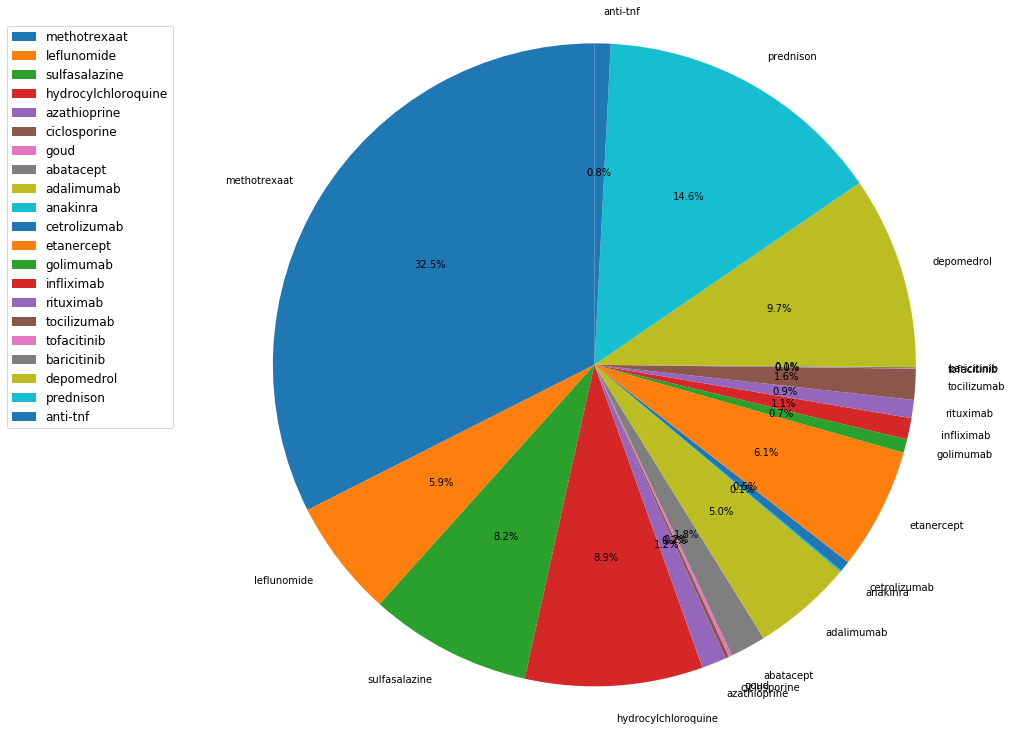

In [120]:
# Create a list of colors (from iWantHue)
fig = plt.figure(figsize=[10, 10])
# Create a pie chart
plt.pie(
    # using data total)arrests
    freq_list,
    # with the labels being officer names
    labels=matchers,
    # with no shadows
    shadow=False,
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal', labeldistance=1.05)
plt.title('Occurences of treatment')
plt.legend(freq_list, labels=matchers, loc="best", bbox_to_anchor=(-0.1, 1., 0., 0.), fontsize='large')

# View the plot
plt.tight_layout()
plt.show()


In [3]:
df_REU = df_REU[df_REU['STELLING'].isin(['Beleid', 'Anamnese', 'Conclusie']) ] 

In [7]:
print(len(df_REU['PATNR'].unique()))

3045


10623


/usr/local/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


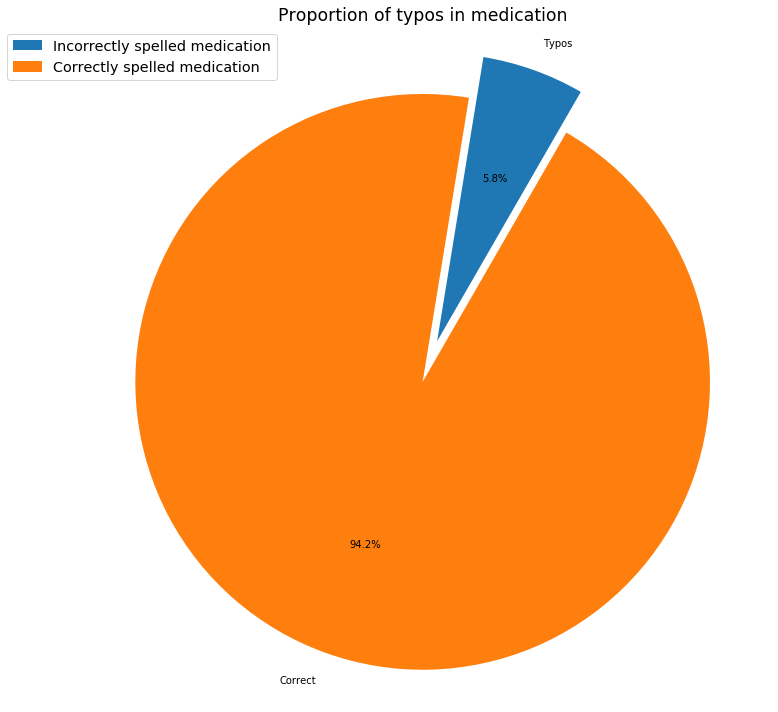

In [49]:
#matchers = ['methotrexaat', 'leflunomide', 'sulfasalazine', 'hydrocylchloroquine', 'azathioprine', 'ciclosporine', 'goud', 'abatacept', 'adalimumab', 'anakinra', 'cetrolizumab', 'etanercept', 'golimumab', 'infliximab', 'rituximab', 'tocilizumab', 'tofacitinib', 'baricitinib', 'depomedrol', 'prednison', 'anti-tnf']
import matplotlib.pyplot as plt

global l_correct

l_correct = []

def correct_words(text):
    for x in re.split(' |, |\&|\n',text):
        if str(x) in MEDICINE:
            l_correct.append(x)
    return

df_REU = df_REU.dropna(subset=['XANTWOORD'])
df_REU['XANTWOORD'].apply(lambda x : correct_words(x))

print(len(l_correct))

# typos worden berekend in functie hierboven
freq_list = ['649', len(l_correct)]
# Create a list of colors (from iWantHue)
fig = plt.figure(figsize=[10, 10])
# Create a pie chart
plt.pie(
    # using data total)arrests
    freq_list,
    # with the labels being officer names
    labels=['Typos', 'Correct'],
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0.15, 0),
    # with the start angle at 90%
    startangle=60,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal', labeldistance=-1.05)
plt.title('Proportion of typos in medication', fontsize='xx-large')
plt.legend(freq_list, labels=['Incorrectly spelled medication', 'Correctly spelled medication'], loc="best", bbox_to_anchor=(0.3, 1., 0., 0.), fontsize='x-large')

# View the plot
plt.tight_layout()
plt.show()



In [11]:
matchers = ['methotrexaat', 'leflunomide', 'sulfasalazine', 'hydrocylchloroquine', 'azathioprine', 'ciclosporine', 'goud', 'abatacept', 'adalimumab', 'anakinra', 'cetrolizumab', 'etanercept', 'golimumab', 'infliximab', 'rituximab', 'tocilizumab', 'tofacitinib', 'baricitinib', 'depomedrol', 'prednison', 'anti-tnf']
pattern = '|'.join(matchers)
print(len(df_REU[df_REU['XANTWOORD'].str.contains(pattern)]['PATNR'].unique()))

2449


### Remove typo's with levenshtein

In [3]:
#pc = em.Processing(df_proc)
print(ACRONYM_MAP.keys())
#pc.typoAnalyzing('XANTWOORD', ACRONYM_MAP.keys())


dict_keys(['mtx', 'mxt', 'mtz', 'mrx', 'mte', 'mtc', 'trexall', 'otrexup', 'rasuvo', 'arara', 'araav', 'lef', 'arava', 'ara', 'leflu', 'lfn', 'lefl', 'lelf', 'lelfu', 'azulfidine', 'ssz', 'saps', 'ssa', 'sasp', 'saz', 'ssap', 'hcq', 'plaquenil', 'hqc', 'hsq', 'plaquneil', 'palquenil', 'plauqenil', 'plaqeunil', 'plaquenyl', 'plaquinil', 'plquenil', 'plaquenik', 'plaqueniel', 'plaqeuenil', 'plaquwnil', 'plaquienil', 'plaquenuil', 'plaeunil', 'plqauenil', 'plaquenl', 'plaqueni', 'plaquanil', 'imuran', 'ciqorin', 'aza', 'immuran', 'uimuran', 'imuarn', 'neoral', 'enoral', 'cic', 'ciclo', 'diclo', 'au', 'abx', 'aba', 'orencia', 'abt', 'humira', 'ada', 'humria', 'hunira', 'huimira', 'humia', 'huira', 'humiraa', 'humar', 'humiira', 'humir', 'hurmira', 'humari', 'kineret', 'ana', 'anti-il1', 'cimzia', 'cetro', 'certo', 'comzia', 'cmizia', 'cimizia', 'cimxia', 'cizia', 'cimzea', 'enbrel', 'etn', 'ena', 'eta', 'embrel', 'enrbel', 'emnbrel', 'ennbrel', 'enbre', 'enberl', 'ebrel', 'glm', 'simponi',

In [4]:

def isDigit(string):
        try: 
            int(string)
            return True
        except ValueError:
            return False
        
def damerauLevenshtein(s, t):
        """
        Not the greatest performance
        https://www.guyrutenberg.com/2008/12/15/damerau-levenshtein-distance-in-python/
        """
        d = {}
        lenstr1 = len(s)
        lenstr2 = len(t)
        for i in range(-1,lenstr1+1):
            d[(i,-1)] = i+1
        for j in range(-1,lenstr2+1):
            d[(-1,j)] = j+1
     
        for i in range(lenstr1):
            for j in range(lenstr2):
                if s[i] == t[j]:
                    cost = 0
                else:
                    cost = 1
                d[(i,j)] = min(
                               d[(i-1,j)] + 1, # deletion
                               d[(i,j-1)] + 1, # insertion
                               d[(i-1,j-1)] + cost, # substitution
                              )
                if i and j and s[i]==t[j-1] and s[i-1] == t[j]:
                    d[(i,j)] = min (d[(i,j)], d[i-2,j-2] + cost) # transposition
     
        return d[lenstr1-1,lenstr2-1]

def correctTypos(text):
    d_typos = {}
    for x in re.split(' |\n',str(text)):
        for word in MEDICINE:
            factor_word = int(len(word)*1/6+1) # vanaf 6 letters naar boven, standaard van 1
            if len(x) > len(word)-factor_word and len(x) < len(word)+factor_word \
            and isDigit(x) == False and str(x) not in ACRONYM_MAP.keys() \
            and str(x) not in MEDICINE  and str(x) not in MONTH_MAP.keys() and str(x) != "goed": # NOT in MEDICINE
                score = damerauLevenshtein(x, word)
                if score < factor_word+1 and score != 0:
                    #print(str(x) + " : " + str(word) + " : " + str(score))
                    if str(x) in d_typos:
                        if word != d_typos[str(x)] and score < damerauLevenshtein(x, d_typos[str(x)]):
                            d_typos[str(x)] = str(word)
                    else:
                        d_typos[str(x)] = str(word)
    for x in d_typos.keys():
        text = text.replace(str(x), d_typos[str(x)])
    print(d_typos)
    return text


def typoCorrecting(df , column, medication_list):
        """
            column 
        """
        df_corrected = df
        df_corrected[column] = df[column].apply(lambda x : self.correctTypos(x))
        return df_corrected


print(correctTypos('blablaa methotrexate metohexaat galimumab'))

{'methotrexate': 'methotrexaat', 'metohexaat': 'methotrexaat', 'galimumab': 'golimumab'}
blablaa methotrexaat methotrexaat golimumab


In [10]:
pc_df.getDF().head(5)

NameError: name 'pc_df' is not defined

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

ofile = open(r'CandidateTypos.txt', 'w')

count_obj = Counter(pc.l_typo)
for x in count_obj.most_common():
    text = "Woord: " + str(x[0]) + "\t\tFrequentie: " + str(x[1])
    try:
        ofile.write(text + "\n")
    except:
        print('nope: ' + str(x[0]))
ofile.close()   
    
#value = c[key]
#print(Counter(pc.l_typo))

nope: das≥
nope: saps≥


#### Typo Research -> Word cloud of most occuring typos 

In [29]:
def appendValueDict(d, key, value):
    """
        d = dict
    """
    if key in d:
        d[key].append(str(value))
    else:
        d[key] = [str(value)]
    return d
d_type = {}

d_type = appendValueDict(d_type, 'A', 'B')
d_type = appendValueDict(d_type, 'A', 'C')
print(d_type)

{'A': ['B', 'C']}


In [23]:

import importlib.util
spec = importlib.util.spec_from_file_location("wordcloud", "/exports/reum/tdmaarseveen/modules/word_cloud/wordcloud/wordcloud.py")
wordcloud = importlib.util.module_from_spec(spec)
spec.loader.exec_module(wordcloud)
wordcloud.WordCloud()

#from wordcloud import WordCloud, STOPWORDS 
from collections import Counter
import matplotlib.pyplot as plt
#l_typo = ['lala', 'pooh', 'winnie', 'pooh', 'kabouter', 'kabouter', 'kabouter', 'kabouter' ]
word_could_dict=Counter(l_typo)
print(len(l_typo))
wordcloud = wordcloud.WordCloud(width = 3000, height = 1500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig('TyposWordcloud.png', bbox_inches='tight')
plt.close()

649


In [80]:
from bokeh.io import show, output_file
from bokeh.models import FactorRange
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, save


factors = [
    ("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"), 
    ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
    ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
    ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec"),

]

p = figure(x_range=FactorRange(*factors), plot_height=250,
           toolbar_location=None, tools="")

x = [ 10, 12, 16, 9, 10, 8, 12, 13, 14, 14, 12, 16 ]
p.vbar(x=factors, top=x, width=0.9, alpha=0.5)

#p.line(x=["Q1", "Q2", "Q3", "Q4"], y=[12, 9, 13, 14], color="red", line_width=2)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

output_file("mixed.html")
save(p)

'/exports/reum/tdmaarseveen/data/mixed.html'

## Step 4: METEOR

In [32]:
df_HIXMET = pd.read_excel('LUMC_Hix_nummers_METEOR.xlsx')
#print(getDim(df_HIXMET))
#
df_HIXMET['pinCode'] = df_HIXMET['pinCode'].str.replace('\.', '', regex=True)
df_HIXMET['pinCode'] = df_HIXMET['pinCode'].str.replace('[a-zA-Z]', '', regex=True)
df_HIXMET = df_HIXMET.dropna(subset=['pinCode'])
df_HIXMET.head(8)

,patientId,objectId,pinCode,SiteID
3,8797095296666,8797095296667,1554758,1
4,8797095296337,8797095296338,0865644,1
5,8797095309195,8797095309196,3156594,1
6,8797095298374,8797095298375,3888302,1
7,8797093560198,8797093560199,4929148,1
8,8797095312802,8797095312803,7664209,1
9,8797095310377,8797095310378,7847042,1
10,8797093375387,8797093375388,9301761,1


In [33]:
#a5 = df_HIXMET['pinCode'].unique()


df_proc = pc_df.getDF()

a5 = pd.to_numeric(df_HIXMET['pinCode'])
a5 = a5[a5 != np.array(None)]
a6 = df_proc['PATNR'].unique()
a6 = a6[a6 != np.array(None)]



# later vervangen met patient id indien er sprake is van overlap
print(len(np.intersect1d(a5, a6)))

#print(getDim(df_proc))
df_proc = df_proc[df_proc['PATNR'].isin(np.intersect1d(a5, a6))]
print(df_proc['PATNR'].head(5).apply(lambda x : df_HIXMET.loc[df_HIXMET['pinCode'] == x, 'patientId']))



#df_proc['patient_id'] = df_proc['PATNR'].apply(lambda x : df_HIXMET[df_HIXMET['pinCode']
#df_proc['patient_id'] = df_proc['PATNR'].apply(lambda x : df_HIXMET[df_HIXMET['pinCode'] == x]['patientId'] )
#print(df_proc.head(5)['PATNR', 'patient_id', 'XANTWOORD'])

2593


NameError: name 'getDim' is not defined

In [26]:

df_MET = pd.read_stata('METEOR_Tjardo.dta')
#df_MET.patientId = df_MET.patientId.astype(int)
#df_MET.patientId = df_MET.patientId.astype(str)

print(getDim(df_MET))
print(getHeaders(df_MET))
#print(len(df_MET['patientId'].unique()))   LKeTdEvN3fI3MliVyoEJeQ==

Rows: 34805	Columns: 1801
['newpatientid', 'VisitUniqueId', 'patientId', 'Betamethasone1Name', 'Betamethasone1StartDate', 'Betamethasone1EndDate', 'Betamethasone1Amount', 'Betamethasone1Strength', 'Betamethasone1Dosage', 'Betamethasone1Iter', 'Betamethasone1Interval', 'Betamethasone1StopReason', 'Betamethasone1iaInjection', 'Betamethasone1jointCode', 'Betamethasone2Name', 'Betamethasone2StartDate', 'Betamethasone2EndDate', 'Betamethasone2Amount', 'Betamethasone2Strength', 'Betamethasone2Dosage', 'Betamethasone2Iter', 'Betamethasone2Interval', 'Betamethasone2StopReason', 'Betamethasone2iaInjection', 'Betamethasone2jointCode', 'Betamethasone3Name', 'Betamethasone3StartDate', 'Betamethasone3EndDate', 'Betamethasone3Amount', 'Betamethasone3Strength', 'Betamethasone3Dosage', 'Betamethasone3Iter', 'Betamethasone3Interval', 'Betamethasone3StopReason', 'Betamethasone3iaInjection', 'Betamethasone3jointCode', 'Cortivazol1Name', 'Cortivazol1StartDate', 'Cortivazol1EndDate', 'Cortivazol1Amount', '

In [27]:
a7 = pd.to_numeric(df_HIXMET['patientId'])
a7 = a7[a7 != np.array(None)]
a8 = df_MET['patientId'].unique()
a8 = a8[a8 != np.array(None)]

print(len(np.intersect1d(a7, a8)))

3432


#### Determine overlap DDR_A and METEOR

In [ ]:
a5 = df_MET['patientId'].unique()
print(df_MET['patientId'].unique()[0]) 
a5 = a5[a5 != np.array(None)]
a6 = df_REU['PATNR'].unique()
print(df_REU['PATNR'].unique()[0]) 
a6 = a6[a6 != np.array(None)]
print(len(np.intersect1d(a5, a6)))

# Determine why these patients are missing in the MedicatieVoorschrift Table
#print(np.setdiff1d(a4, a3)[:5])

#print(getHeaders(df_ddrA.head(5)))

In [23]:
df_MET['DAS4_ESRrecalculated'].unique()

array([3.66666198, 3.12362862, 1.0238204 , ..., 3.53384805, 2.65899587,
       2.47008109])

df_MET[df_MET['patientId'] == 8797093022725.0]
#print(df_MET['patientId'].unique()[0])
#df_MET.head()

### Zoektocht naar gewrichtspop

In [ ]:
#df_REU.head(5)
print(getHeaders(df_REU))
#print(len(df_REU['DOSSIERID'].unique()))
#print(len(df_REU['DATUM'].unique()))
#print(df_REU['STELLING'].unique())

#txt_allopt = open("Allopt.txt", "w")
#for x in df_REU['STELLING'].unique():
#    txt_allopt.write(str(x) + "\n")
#txt_allopt.close()

#makeFile('Allopt.txt', df_REU['STELLING'].unique())
makeFile('Allopt2.txt', df_ddrA['STELLING'].unique())

print(df_ddrA[df_ddrA['STELLING'] == 'Gewrichtspop'])

df_REU[df_REU['ANTWOORD'].str.contains('Gewrichtspop')][['ANTWOORD', 'PATNR','STELLING']].head(22)
#mylist = ['gewrichtspop']
makeFile('Output.txt', df_REU[df_REU['ANTWOORD'].str.contains('Gewrichtspop')]['ANTWOORD'])

#mel_count= df_REU['ANTWOORD'].str.contains('gewrichtspop').sum()
#if mel_count>0:
#    print ("There are {m} Mels".format(m=mel_count))

#s.isin(['gewrichtspop'])

### Checking wheter or not Medications are mentioned in the conclusion of the converted METEOR data (< 2011) 

Answer: No Medication found in converted METEOR data

In [13]:
df_conc = df_REU[df_REU['STELLING'] == 'Conclusie']
df_conc = df_conc[df_conc['XANTWOORD'].str.contains('conversie gegevens meteor')]

def checkForMed(text):
    med_found = False
    for x in re.split(' |, |\&|\n',text):
        #print(x)
        if str(x) in MEDICINE:
            med_found = True
            break
    return med_found

df_conc['XANTWOORD'] = df_conc['XANTWOORD'].apply(lambda x: handle_stickychars(str(x)))
df_conc['XANTWOORD'] = df_conc['XANTWOORD'].apply(lambda x: handle_acronym(str(x)))
df_conc['XANTWOORD'] = df_conc['XANTWOORD'].apply(lambda x: handle_acronym(str(x)))


print('Medication in conclusion of converted METEOR data: ' + str(len(df_conc[df_conc['XANTWOORD'].apply(lambda x : checkForMed(x))]['XANTWOORD'])))

Medication in conclusion of converted METEOR data: 0
